In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\карина\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\карина\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
 pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\карина\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
display(df['price'].describe())
print(f"Количество значений цены домов больше 2 миллионов: {(df['price'] > 2_000_000).sum()}")

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Количество значений цены домов больше 2 миллионов: 198


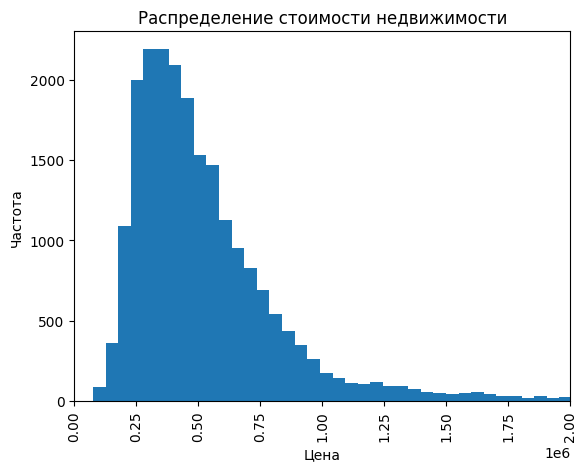

In [8]:
plt.hist(df['price'], bins=150)
plt.xlim(0, 2_000_000)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.xticks(rotation=90)
plt.show()

In [9]:
display(df['sqft_living'].describe())
print(f"Количество значений домов с жилой площадью более 5.000 кв.м: {(df['sqft_living'] > 5_000).sum()}")

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

Количество значений домов с жилой площадью более 5.000 кв.м: 211


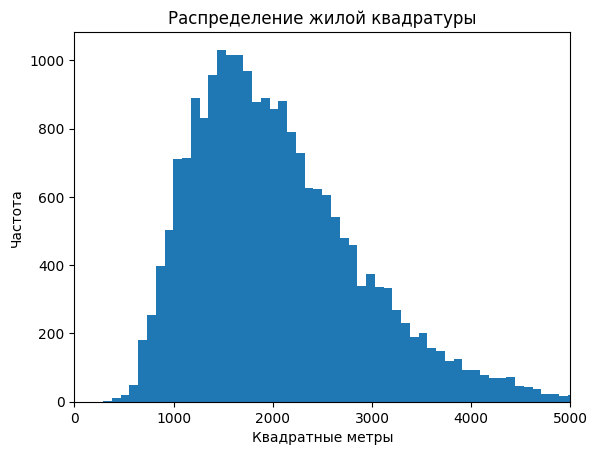

In [10]:
plt.hist(df['sqft_living'], bins=150)
plt.xlim(0, 5_000)
plt.title('Распределение жилой квадратуры')
plt.xlabel('Квадратные метры')
plt.ylabel('Частота')
plt.show()

Распределение нормальное,  основная часть домов имеет квадратную жилую площадь в интервале от 1200 до 2700

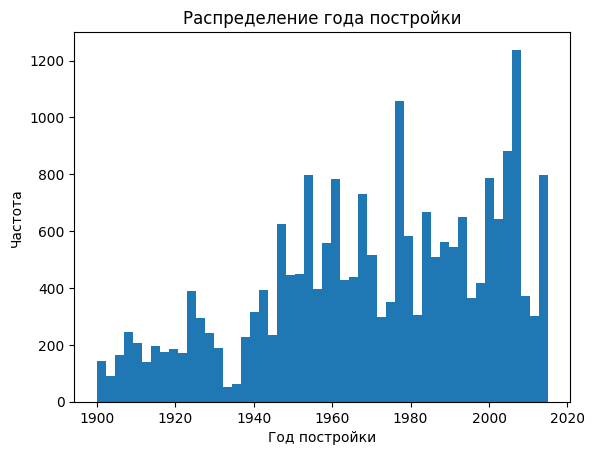

In [11]:

plt.hist(df['yr_built'], bins=50)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Частота')
plt.show()

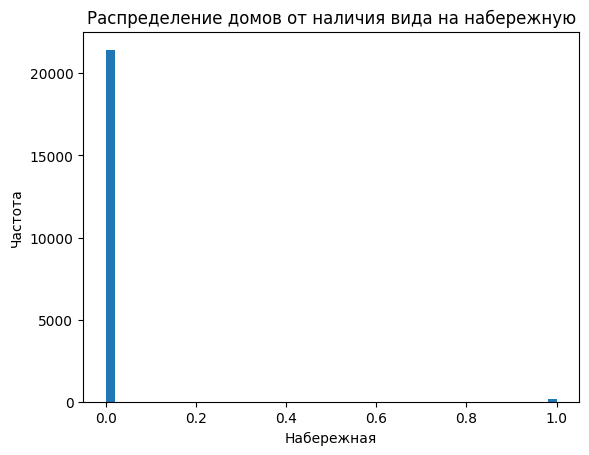

In [12]:
plt.hist(df['waterfront'], bins=50)
plt.title('Распределение домов от наличия вида на набережную')
plt.xlabel('Набережная')
plt.ylabel('Частота')
plt.show()

 дома не имеют вид на набережную

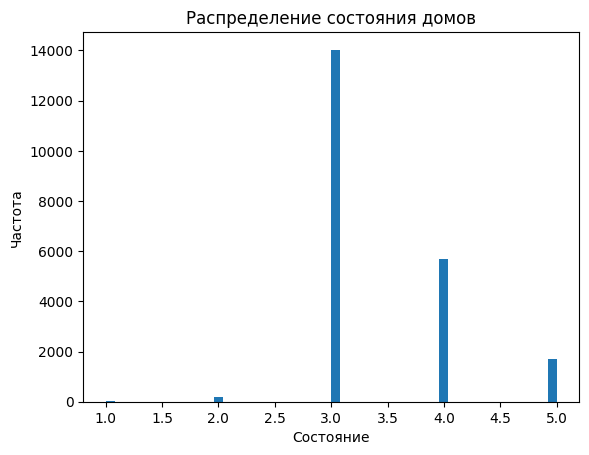

In [13]:
plt.hist(df['condition'], bins=50)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние')
plt.ylabel('Частота')
plt.show()

большинстве случае оценка состояния у домов находится в районе 3, меньше в 4, и совсем немного домов имеют оценку в 5 баллов.

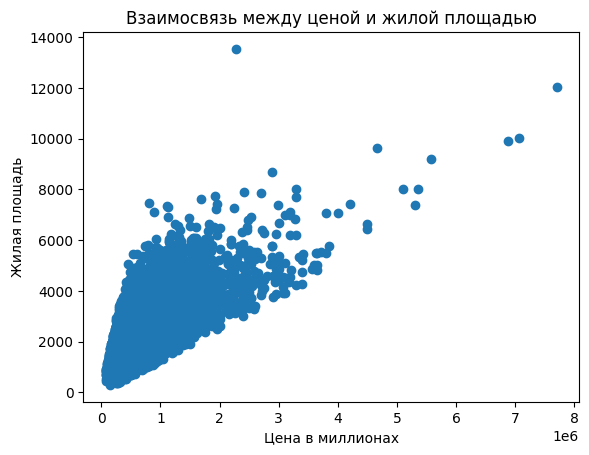

In [14]:
plt.scatter(df['price'], df['sqft_living'])
plt.title('Взаимосвязь между ценой и жилой площадью')
plt.xlabel('Цена в миллионах')
plt.ylabel('Жилая площадь')
plt.show()

Большинство домов находятся в пределах 2.5 миллионов и до 5.000 квадратных метров. Есть выбросы, например один из домов за 2.5 миллиона имеет площадь почти в 14.000 квадратных метров, или же например один из домов с 12.000 квадратными метрами имеет цену в 7.7 миллионов.

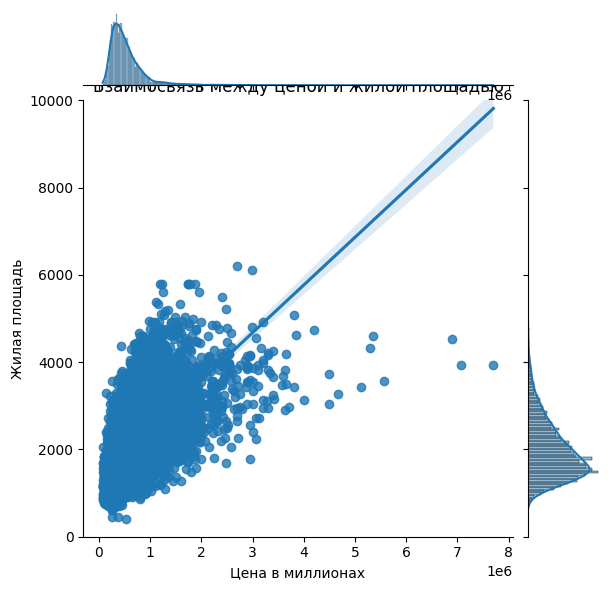

In [15]:
sns.jointplot(x=df['price'], y=df['sqft_living15'], kind='reg')
plt.title('Взаимосвязь между ценой и жилой площадью')
plt.xlabel('Цена в миллионах')
plt.ylim(0, 10000)
plt.ylabel('Жилая площадь')
plt.show()

По jointplot мы можем определить, что чем выше была жилая площадь, тем была выше цена.

C:\Users\карина\AppData\Local\Temp\ipykernel_22844\2548424402.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


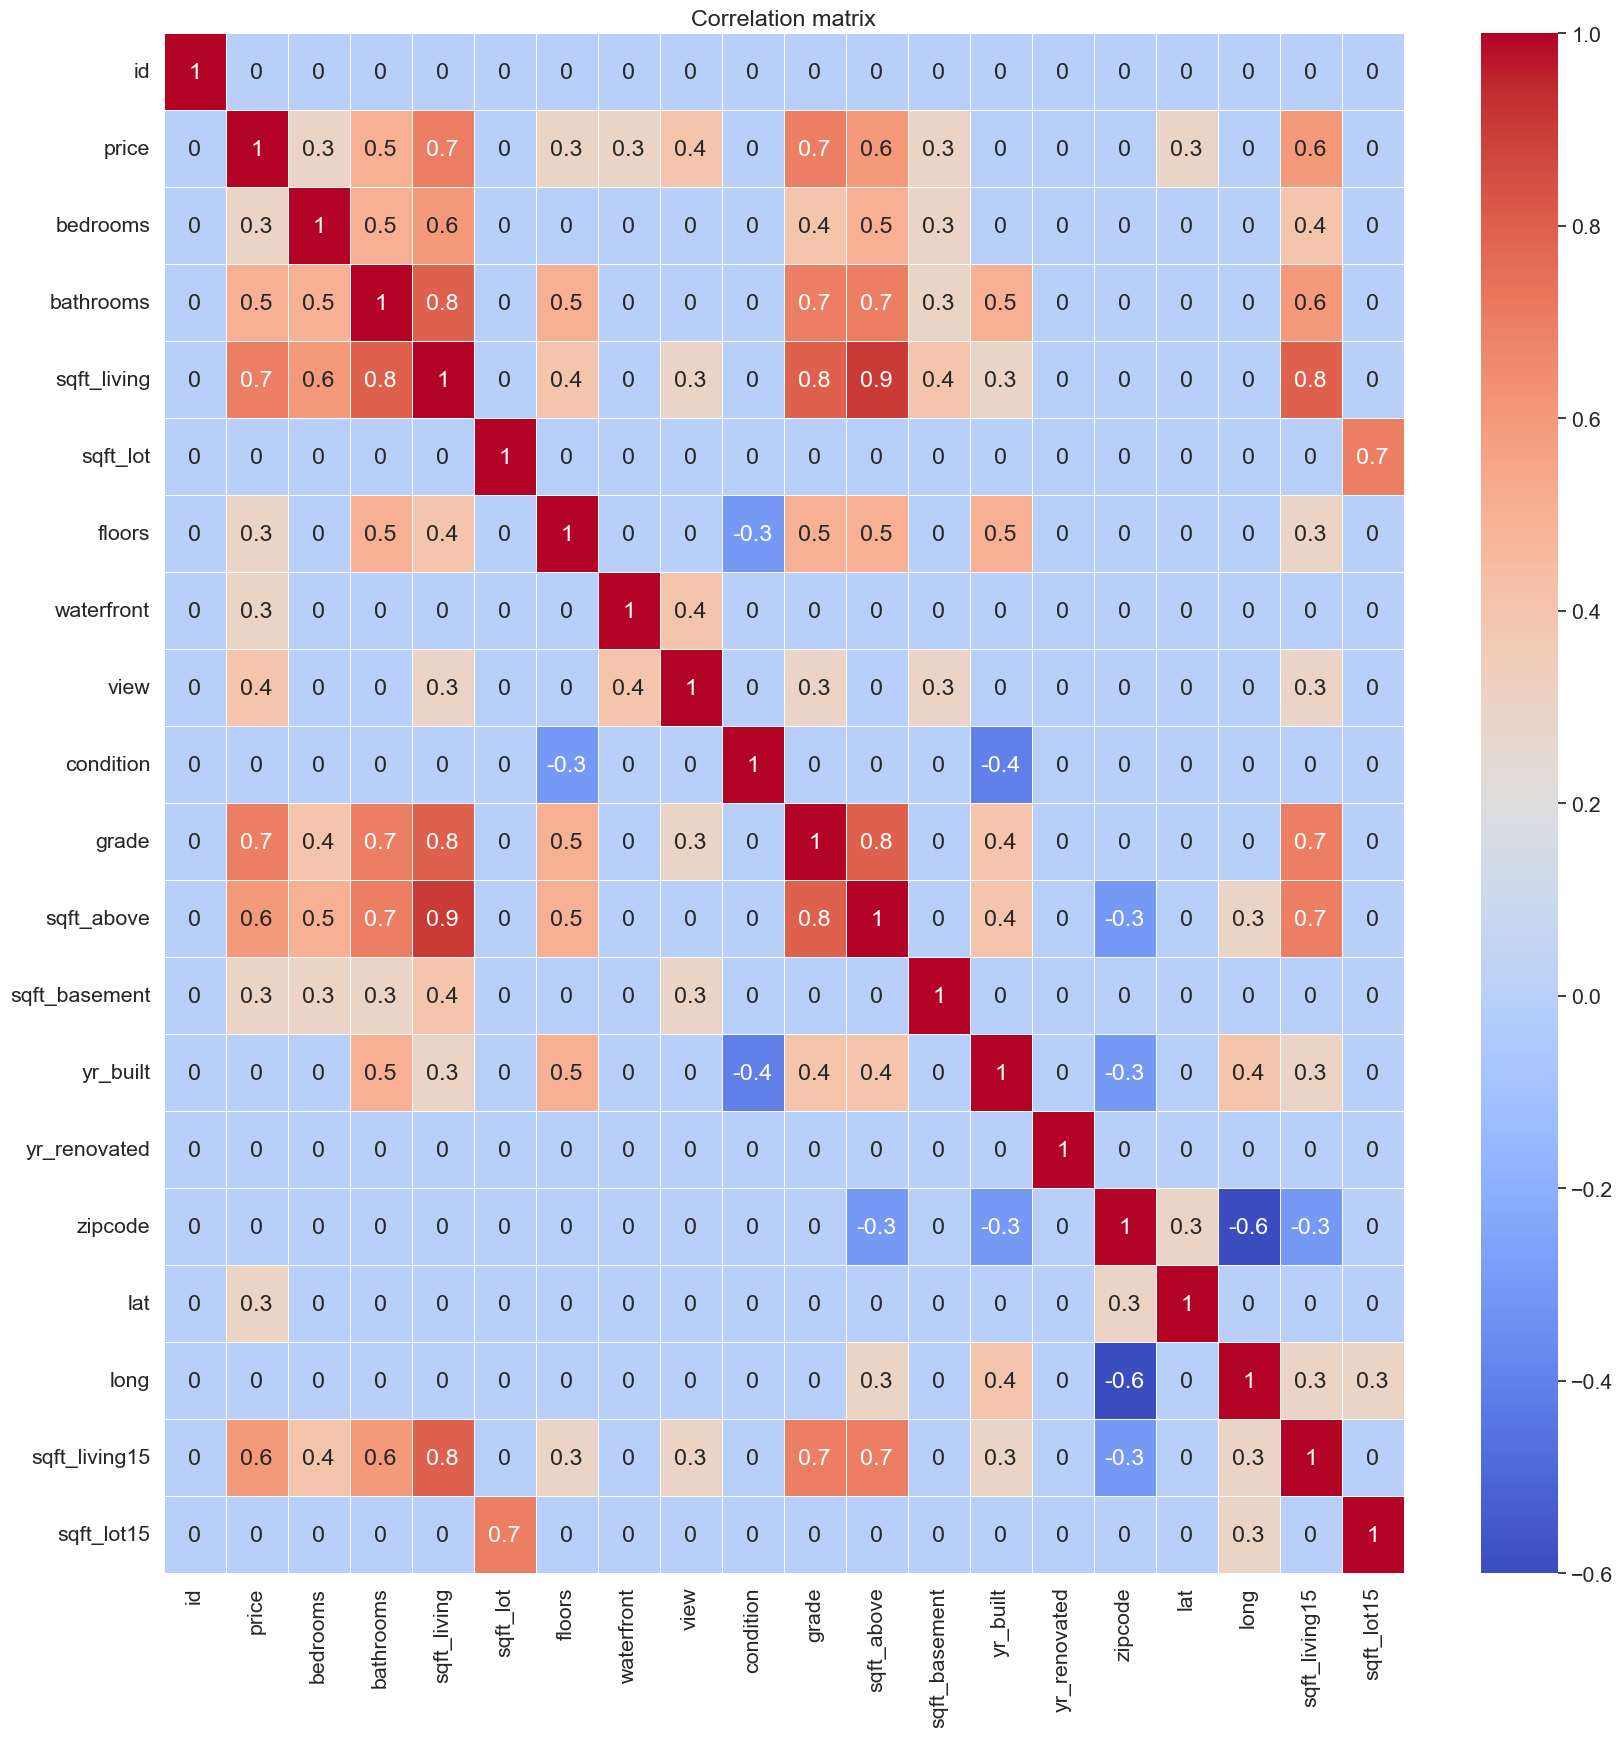

In [16]:
import numpy as np

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

Взаимосвязь в цене имеется:

batrooms 0.5
sqft_living 0.7
grade 0.7
sqft_above 0.6
sqft_living15 0.6

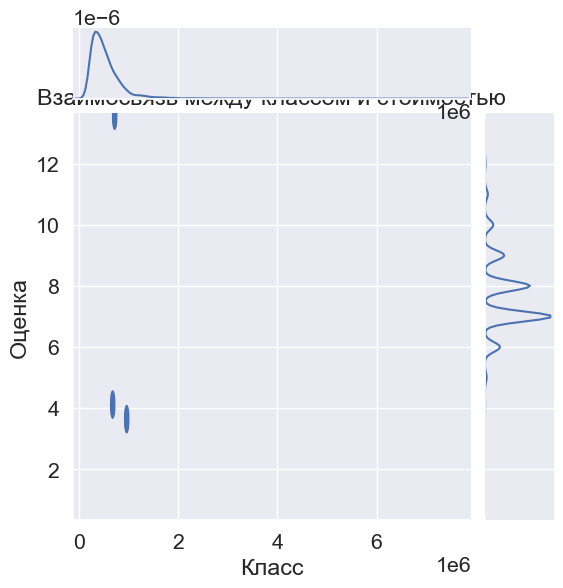

In [17]:
sns.jointplot(x=df['price'], y=df['grade'], kind='kde')
plt.title('Взаимосвязь между классом и стоимостью')
plt.xlabel('Класс')
plt.ylabel('Оценка')
plt.show()

<Axes: xlabel='price'>

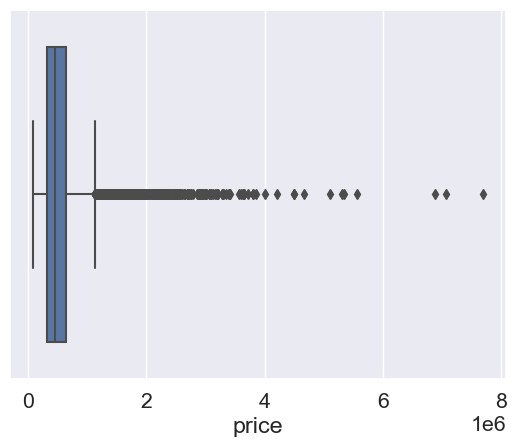

In [18]:
sns.boxplot(x=df['price'], whis=1.5)

 основная масса всех домов находится в районе 500-700 тысяч стоимости, и огромное количество выбросов.